In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Amazon Sale Report.csv")
df = df.drop("Unnamed: 22", axis= 1)
df.head()

<ipython-input-2-0733081fb9f0>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [ ]:
cancelled_count = df[df['Status'] == 'Cancelled'].shape[0]

total_count = len(df)

cancelled_percentage = (cancelled_count / total_count) * 100

print(f"Total Cancelled Orders: {cancelled_count}")
print(f"Percentage of Cancelled Orders: {cancelled_percentage:.2f}%")


Total Cancelled Orders: 18332
Percentage of Cancelled Orders: 14.21%


Fulfilment
Amazon      12.788468
Merchant    17.468238
Name: Status, dtype: float64


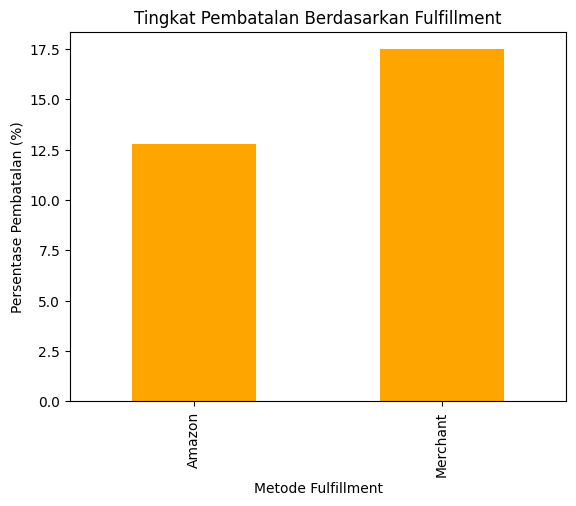

In [ ]:
# Mengelompokkan data berdasarkan Fulfillment dan Status
fulfillment_cancel_rate = df.groupby('Fulfilment')['Status'].apply(lambda x: (x.str.contains('Cancelled', case=False).sum() / len(x)) * 100)

# Print hasil
print(fulfillment_cancel_rate)

# Visualisasi
fulfillment_cancel_rate.plot(kind='bar', color='orange', title='Tingkat Pembatalan Berdasarkan Fulfillment')
plt.ylabel('Persentase Pembatalan (%)')
plt.xlabel('Metode Fulfillment')
plt.show()

Status      Cancelled   Pending  Pending - Waiting for Pick Up   Shipped  \
Fulfilment                                                                 
Amazon      12.788468  0.462664                       0.000000  86.73995   
Merchant    17.468238  0.618683                       0.715431   0.00000   

Status      Shipped - Damaged  Shipped - Delivered to Buyer  \
Fulfilment                                                    
Amazon               0.000000                      0.000000   
Merchant             0.002546                     73.246429   

Status      Shipped - Lost in Transit  Shipped - Out for Delivery  \
Fulfilment                                                          
Amazon                        0.00000                    0.000000   
Merchant                      0.01273                    0.089111   

Status      Shipped - Picked Up  Shipped - Rejected by Buyer  \
Fulfilment                                                     
Amazon                 0.000000      

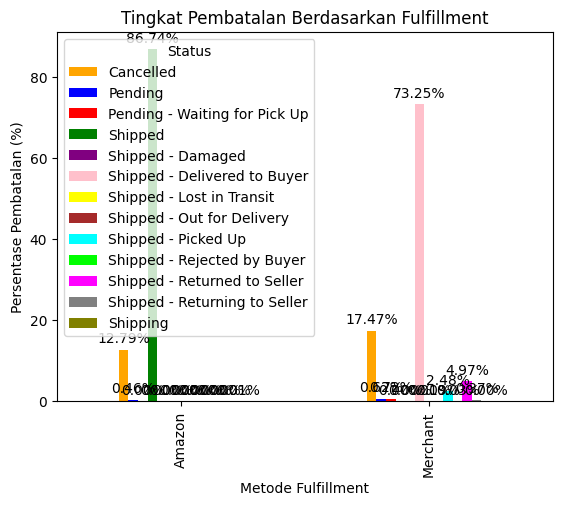

In [ ]:
status_fulfillment_rate = df.groupby(['Fulfilment', 'Status']).size().unstack(fill_value=0)

# Menghitung persentase untuk setiap status
status_fulfillment_rate_percentage = status_fulfillment_rate.div(status_fulfillment_rate.sum(axis=1), axis=0) * 100

# Print hasil persentase per status untuk setiap Fulfillment
print(status_fulfillment_rate_percentage)

# Daftar 13 warna yang berbeda
colors = ['orange', 'blue', 'red', 'green', 'purple', 'pink', 'yellow', 'brown', 'cyan', 'lime', 'magenta', 'gray', 'olive']

# Visualisasi dengan warna berbeda
ax = status_fulfillment_rate_percentage.plot(kind='bar', color=colors[:len(status_fulfillment_rate_percentage.columns)],
                                             title='Tingkat Pembatalan Berdasarkan Fulfillment')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label sumbu
plt.ylabel('Persentase Pembatalan (%)')
plt.xlabel('Metode Fulfillment')

# Menampilkan legenda
plt.legend(title='Status')

# Menampilkan grafik
plt.show()

Status              Cancelled   Pending  Pending - Waiting for Pick Up  \
ship-service-level                                                       
Expedited           12.890594  0.466061                       0.000000   
Standard            17.118434  0.607037                       0.696234   

Status                Shipped  Shipped - Damaged  \
ship-service-level                                 
Expedited           86.643345           0.000000   
Standard             2.539643           0.002478   

Status              Shipped - Delivered to Buyer  Shipped - Lost in Transit  \
ship-service-level                                                            
Expedited                               0.000000                   0.000000   
Standard                               71.280971                   0.012389   

Status              Shipped - Out for Delivery  Shipped - Picked Up  \
ship-service-level                                                    
Expedited                          

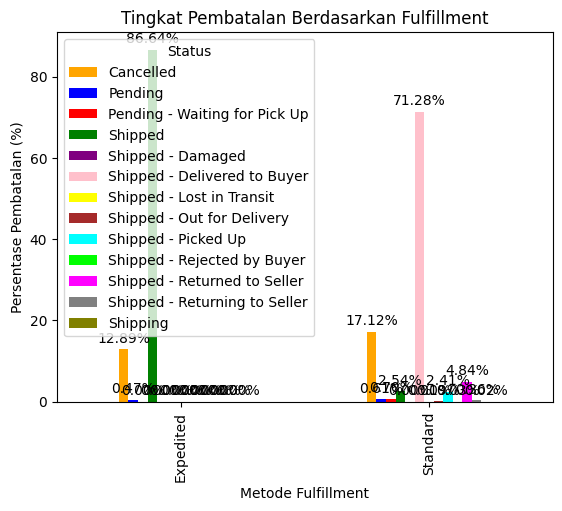

In [ ]:
status_fulfillment_rate = df.groupby(['ship-service-level', 'Status']).size().unstack(fill_value=0)

# Menghitung persentase untuk setiap status
status_fulfillment_rate_percentage = status_fulfillment_rate.div(status_fulfillment_rate.sum(axis=1), axis=0) * 100

# Print hasil persentase per status untuk setiap Fulfillment
print(status_fulfillment_rate_percentage)

# Daftar 13 warna yang berbeda
colors = ['orange', 'blue', 'red', 'green', 'purple', 'pink', 'yellow', 'brown', 'cyan', 'lime', 'magenta', 'gray', 'olive']

# Visualisasi dengan warna berbeda
ax = status_fulfillment_rate_percentage.plot(kind='bar', color=colors[:len(status_fulfillment_rate_percentage.columns)],
                                             title='Tingkat Pembatalan Berdasarkan Fulfillment')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label sumbu
plt.ylabel('Persentase Pembatalan (%)')
plt.xlabel('Metode Fulfillment')

# Menampilkan legenda
plt.legend(title='Status')

# Menampilkan grafik
plt.show()

Status         Cancelled   Pending  Pending - Waiting for Pick Up     Shipped  \
Category                                                                        
Blouse         12.526998  0.323974                       0.107991   67.278618   
Bottom         13.636364  0.227273                       0.454545   50.454545   
Dupatta         0.000000  0.000000                       0.000000  100.000000   
Ethnic Dress   12.510785  0.603969                       0.000000   65.142364   
Saree          12.804878  0.000000                       0.000000   72.560976   
Set            14.591122  0.501153                       0.214780   60.983613   
Top            12.012804  0.517793                       0.178874   67.247223   
Western Dress  13.690323  0.593548                       0.509677   48.258065   
kurta          14.545783  0.497223                       0.144355   61.739880   

Status         Shipped - Damaged  Shipped - Delivered to Buyer  \
Category                                  

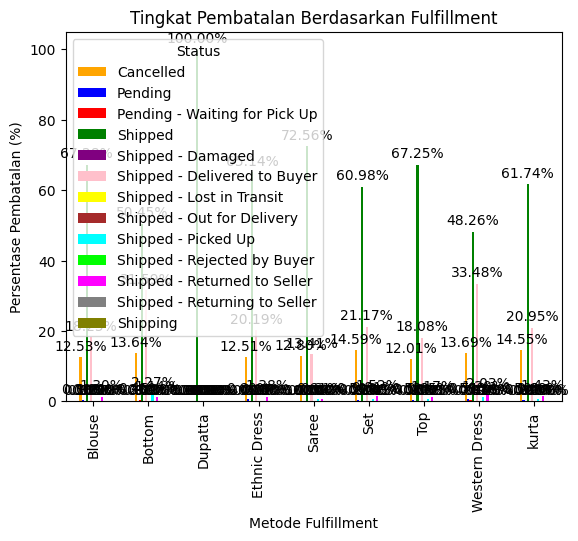

In [ ]:
status_fulfillment_rate = df.groupby(['Category', 'Status']).size().unstack(fill_value=0)

# Menghitung persentase untuk setiap status
status_fulfillment_rate_percentage = status_fulfillment_rate.div(status_fulfillment_rate.sum(axis=1), axis=0) * 100

# Print hasil persentase per status untuk setiap Fulfillment
print(status_fulfillment_rate_percentage)

# Daftar 13 warna yang berbeda
colors = ['orange', 'blue', 'red', 'green', 'purple', 'pink', 'yellow', 'brown', 'cyan', 'lime', 'magenta', 'gray', 'olive']

# Visualisasi dengan warna berbeda
ax = status_fulfillment_rate_percentage.plot(kind='bar', color=colors[:len(status_fulfillment_rate_percentage.columns)],
                                             title='Tingkat Pembatalan Berdasarkan Fulfillment')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label sumbu
plt.ylabel('Persentase Pembatalan (%)')
plt.xlabel('Metode Fulfillment')

# Menampilkan legenda
plt.legend(title='Status')

# Menampilkan grafik
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl_city = LabelEncoder()
df['ship-city'] = lbl_city.fit_transform(df['ship-city'])
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,4795,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,776,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,5353,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,6140,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,1466,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1,INR,517.00,2906,TELANGANA,500013.0,IN,NaN,False,NaN
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,INR,999.00,2620,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1,INR,690.00,2906,TELANGANA,500049.0,IN,NaN,False,NaN
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,INR,1199.00,2938,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
